# Heat Fluxes

In [99]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import matplotlib.colors as colors
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw
import scipy.ndimage as filter
import scipy.interpolate as interpolate

In [58]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import filt_funcs as ff

In [59]:
# Set title size
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16  # Titles larger

# Set axis label size
plt.rcParams['axes.labelsize'] = 14  # Labels slightly smaller

# Load data (from eddy_diff notebook)

In [145]:
diff_rho = xr.open_dataset('/swot/SUM05/amf2288/diff_rho_3.nc')
K_rho = diff_rho.K_rho

In [146]:
K_rho = K_rho.rename({'rho_grid':'density'})

In [147]:
term2_ds = xr.open_dataset('/swot/SUM05/amf2288/var-boxes/term2.nc').load()
term2 = term2_ds.ct_e_z2_filt.rename('term2')

In [155]:
term3_2 = xr.open_dataset('/swot/SUM05/amf2288/var-boxes/Ke_term3.nc').load()
term3 = np.sqrt(term3_2.ct_m)

In [156]:
%%time
temp_flux_dxdy = K_rho*(term2/term3)

CPU times: user 152 ms, sys: 564 ms, total: 716 ms
Wall time: 714 ms


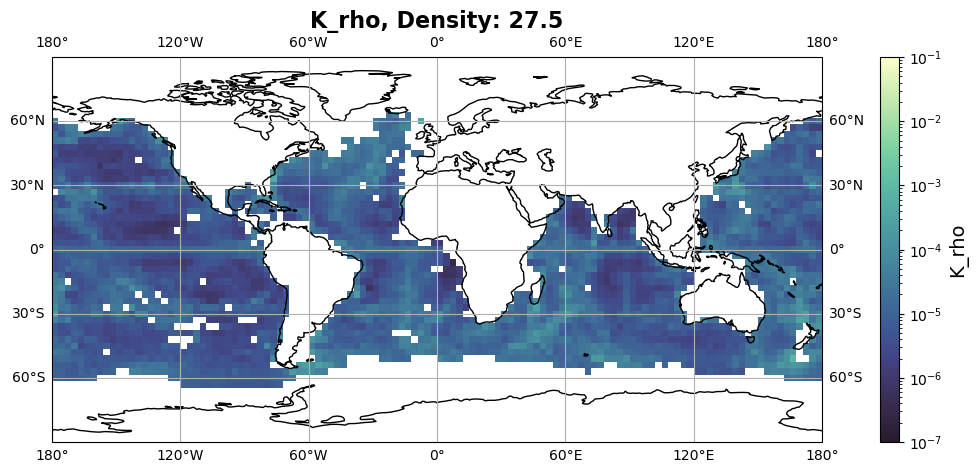

In [151]:
density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
K_rho.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-7, vmax=1e-1))
ax.set_title('K_rho, Density: {}'.format(np.round(term2.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/K_rho_275.png', bbox_inches='tight')

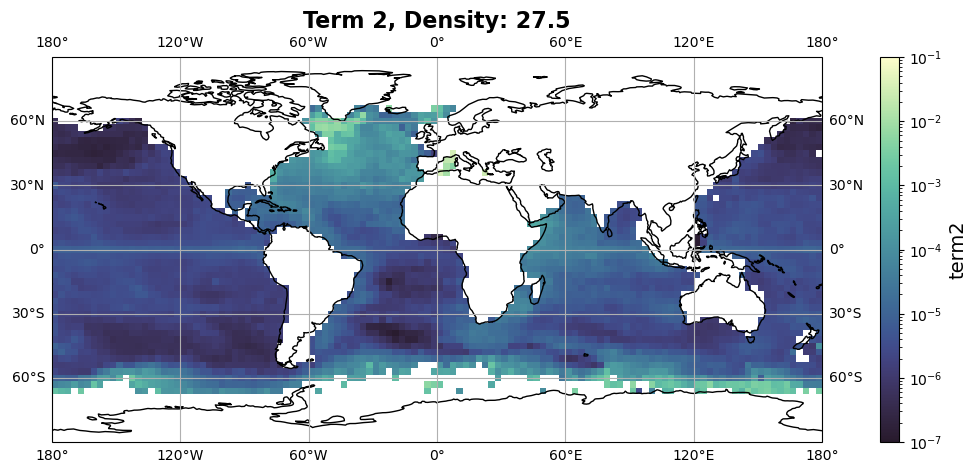

In [152]:
density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
term2.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-7, vmax=1e-1))
ax.set_title('Term 2, Density: {}'.format(np.round(term2.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/term2_275.png', bbox_inches='tight')

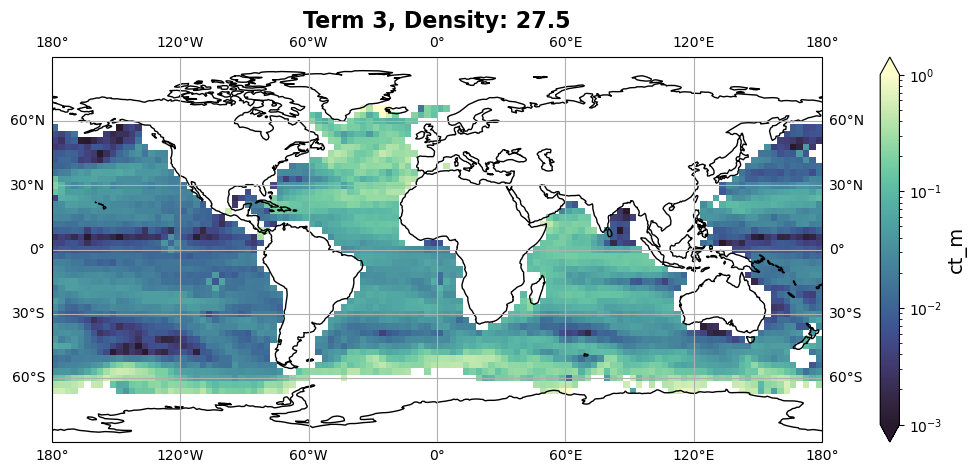

In [168]:
density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
term3.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-3, vmax=1))
ax.set_title('Term 3, Density: {}'.format(np.round(term3.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/term3_NOSQUARE_275.png', bbox_inches='tight')

CPU times: user 797 ms, sys: 60.2 ms, total: 857 ms
Wall time: 854 ms


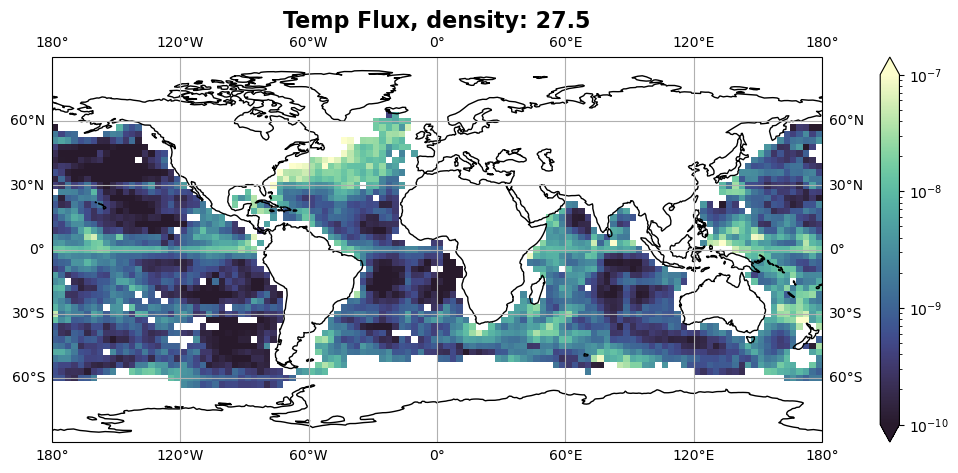

In [177]:
%%time

density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
temp_flux_dxdy.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-10, vmax=1e-7))
plt.title('Temp Flux, density: {}'.format(np.round(temp_flux_dxdy.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/temp_flux_275.png', bbox_inches='tight')

In [178]:
density = temp_flux_dxdy.density + 1000
heat_flux = temp_flux_dxdy*density*4000

CPU times: user 680 ms, sys: 56.9 ms, total: 737 ms
Wall time: 733 ms


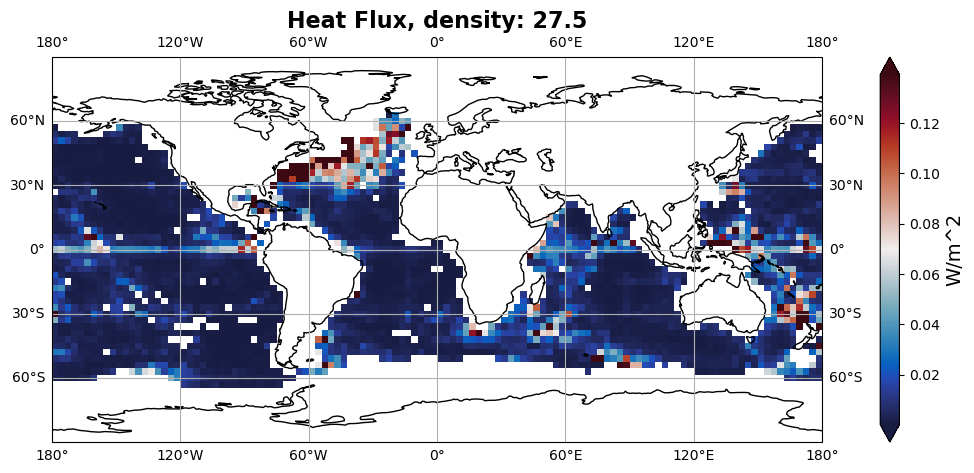

In [179]:
%%time

density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
heat_flux.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.balance, robust=True,cbar_kwargs={'label': 'W/m^2'})
plt.title('Heat Flux, density: {}'.format(np.round(temp_flux_dxdy.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/heat_flux_275.png', bbox_inches='tight')

heat flux = $\widetilde{u}\widetilde{T} \frac{^\circ C m}{s}*\rho_0 \frac{kg}{m^3}*C_p \frac{J}{kg ^\circ C}$

heat flux = $2570 \frac{W}{m^2}$

where $\rho_0 = density + 1000$,  $C_p = 4000 \frac{J}{kg ^\circ C}$

